In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 


### Load images

In [13]:
def resize_(img,p=50):
    width = int(img.shape[1] * p / 100)
    height = int(img.shape[0] * p / 100)
    resized = cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)
    return resized

zel = resize_(cv2.imread("./inputs/P4/zelensky.png"))
zel_mask = resize_(cv2.imread("./inputs/P4/zelensky_mask.png"))
put = resize_(cv2.imread("./inputs/P4//putin.png"))
put_mask = resize_(cv2.imread("./inputs/P4/putin_mask.png"))


### A

In [14]:
def bilateral_weight(i,j,k,l,img,sigma_d,sigma_r):
    tmp_1 = ((i-k)**2 + (j-l)**2)/(2*sigma_d**2)
    tmp_2 = (np.linalg.norm(img[i,j]-img[k,l]))**2/(2*sigma_r**2)
    tmp_3 = (-1)*(tmp_1 + tmp_2)
    return np.exp(tmp_3)

def bilateral_filter(img:np.array,r,sigma_d,sigma_r):
    shape = img.shape 
    out = np.zeros_like(img)
    for i in range(shape[0]):
        for j in range(shape[1]):
            sigma_w = 0 
            f_out = np.array([0,0,0]) 
            for k in range(i-r,i+r+1):
                for l in range(j-r,j+r+1):
                    if k < 0 or l < 0 or k>= shape[0] or l >= shape[1]:
                        continue
                    w = bilateral_weight(i,j,k,l,img,sigma_d,sigma_r)
                    sigma_w += w 
                    np.add(f_out, w*img[k,l,:], out=f_out, casting="unsafe")
                    
            out[i,j,:] = f_out / sigma_w
            
    return out
 


### B

In [15]:
results = []
R = [2,4,6,8]
sigma_R = [10,45,80]
sigma_D = [10,45,80]
for s_d in sigma_D:
    for s_r in sigma_R:
        for r in R:
            results.append(bilateral_filter(put,r,s_d,s_r)) 


In [16]:
show = []
for i in range(0,len(results),4):
    show.append(cv2.hconcat(results[i:i+4]))
out = cv2.vconcat(show)
cv2.imwrite("./outputs/P04/play-with-parameters.png",out)

True

### C & D

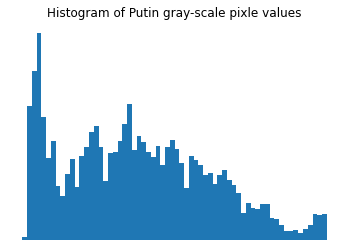

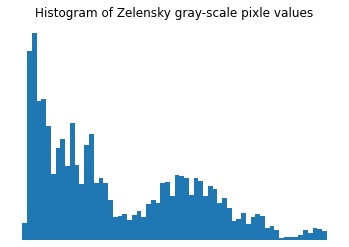

In [17]:
Test = [put,zel]
Names = ["Putin","Zelensky"]
def color_image(img,name):
    out = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    if name == "Putin":
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                val = img[row,col]
                if val < 55 :
                   out[row,col,:] = (0,48,80)
                elif  val < 75 :
                    out[row,col,:] = (112,150,160)
                elif val < 125:
                    out[row,col,:] = (218, 20, 21)
                else :
                    out[row,col,:] = (250, 227, 173)
         
        out_mask = cv2.bitwise_and(out, out, mask=put_mask[:,:,0])
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                if out_mask[row,col,2] != 0 :
                    continue
                if col <img.shape[1]/2:
                    out_mask[row,col,:] = (218, 20, 21)
                else:
                    out_mask[row,col,:] = (112,150,160)
    else:
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                val = img[row,col]
                if val < 70 :
                   out[row,col,:] = (0,48,80)
                elif  val < 105 :
                    out[row,col,:] = (112,150,160)
                elif val < 155:
                    out[row,col,:] = (218, 20, 21)
                else :
                    out[row,col,:] = (250, 227, 173)
         
        out_mask = cv2.bitwise_and(out, out, mask=zel_mask[:,:,0])
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                if out_mask[row,col,2] != 0 :
                    continue
                if col <img.shape[1]/2:
                    out_mask[row,col,:] = (218, 20, 21)
                else:
                    out_mask[row,col,:] = (112,150,160)
    

    out = cv2.cvtColor(out,cv2.COLOR_RGB2BGR)
    out_mask = cv2.cvtColor(out_mask,cv2.COLOR_RGB2BGR)
    return out,out_mask
                    
        
                    
for test_i in range(2):
    result = []
    test = Test[test_i]
    result.append(test)
    test = bilateral_filter(test,6,45,10)
    result.append(test)
    test = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
    tmp = cv2.cvtColor(test,cv2.COLOR_GRAY2BGR)
    result.append(tmp)
    plt.hist(test.flatten(),64)
    plt.axis("off")
    plt.title("Histogram of {0} gray-scale pixle values".format(Names[test_i]))
    plt.show()
    o,o_m = color_image(test,Names[test_i])
    result.append(o)
    result.append(o_m)
    cv2.imwrite("./outputs/P04/{0}.png".format(Names[test_i]),cv2.hconcat(result))
    plt.show()

### E

In [18]:
import random
def color_random(img):
    out = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    ran = random.sample(list(range(256)),3)
    ran.sort()
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            val = img[row,col]
            if val < ran[0] :
                out[row,col,:] = (0,48,80)
            elif  val < ran[1] :
                out[row,col,:] = (112,150,160)
            elif val < ran[2]:
                out[row,col,:] = (218, 20, 21)
            else :
                out[row,col,:] = (250, 227, 173)
        
    out_mask = cv2.bitwise_and(out, out, mask=zel_mask[:,:,0])
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if out_mask[row,col,2] != 0 :
                continue
            if col <img.shape[1]/2:
                out_mask[row,col,:] = (218, 20, 21)
            else:
                out_mask[row,col,:] = (112,150,160)


    out = cv2.cvtColor(out,cv2.COLOR_RGB2BGR)
    out_mask = cv2.cvtColor(out_mask,cv2.COLOR_RGB2BGR)
    return out,out_mask       
result = []
test = Test[1]
test = bilateral_filter(test,6,45,10)
test = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)

for _ in range(24):
    o,o_m = color_random(test)
    result.append(o_m)

t1 = cv2.hconcat(result[:6])
t2 = cv2.hconcat(result[6:12])
t3 = cv2.hconcat(result[12:18])
t4 = cv2.hconcat(result[18:24]) 
cv2.imwrite("./outputs/P04/{0}-random.png".format(Names[test_i]),cv2.vconcat([t1,t2,t3,t4]))


True